# Import required libraries 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import joblib
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier


import warnings 
warnings.filterwarnings('ignore')

# Loading Dataset 

In [2]:
# Load the dataset  
data = pd.read_csv('C:/Users/USER/Desktop/diabetes2.csv')  


In [3]:
# Display first few rows  
data.head()  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Handling 

In [7]:
# Display basic information  
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# number of rows= 768 , Number of columns= 9 
data.shape

(768, 9)

In [9]:
# Check basic statistics  
data.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
#show a 10 randomly data  
data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
263,3,142,80,15,0,32.4,0.200,63,0
114,7,160,54,32,175,30.5,0.588,39,1
183,5,73,60,0,0,26.8,0.268,27,0
392,1,131,64,14,415,23.7,0.389,21,0
739,1,102,74,0,0,39.5,0.293,42,1
672,10,68,106,23,49,35.5,0.285,47,0
650,1,91,54,25,100,25.2,0.234,23,0
707,2,127,46,21,335,34.4,0.176,22,0
404,5,168,64,0,0,32.9,0.135,41,1
454,2,100,54,28,105,37.8,0.498,24,0


# Cleaning data and checking for missing data

In [23]:
# drop duplicates for remove the duplicates data 
data = data.drop_duplicates()

In [25]:
# Columns where zero values should be replaced
columns_to_fix = ['Glucose', 'BloodPressure', 'BMI', 'SkinThickness', 'Insulin']
# Replace 0s with NaN
data[columns_to_fix] = data[columns_to_fix].replace(0, np.nan)
# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
data[columns_to_fix] = imputer.fit_transform(data[columns_to_fix])
# Verify there are no more missing values
data.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [27]:
#verify if the minimum value are zero 0
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data Visualization 

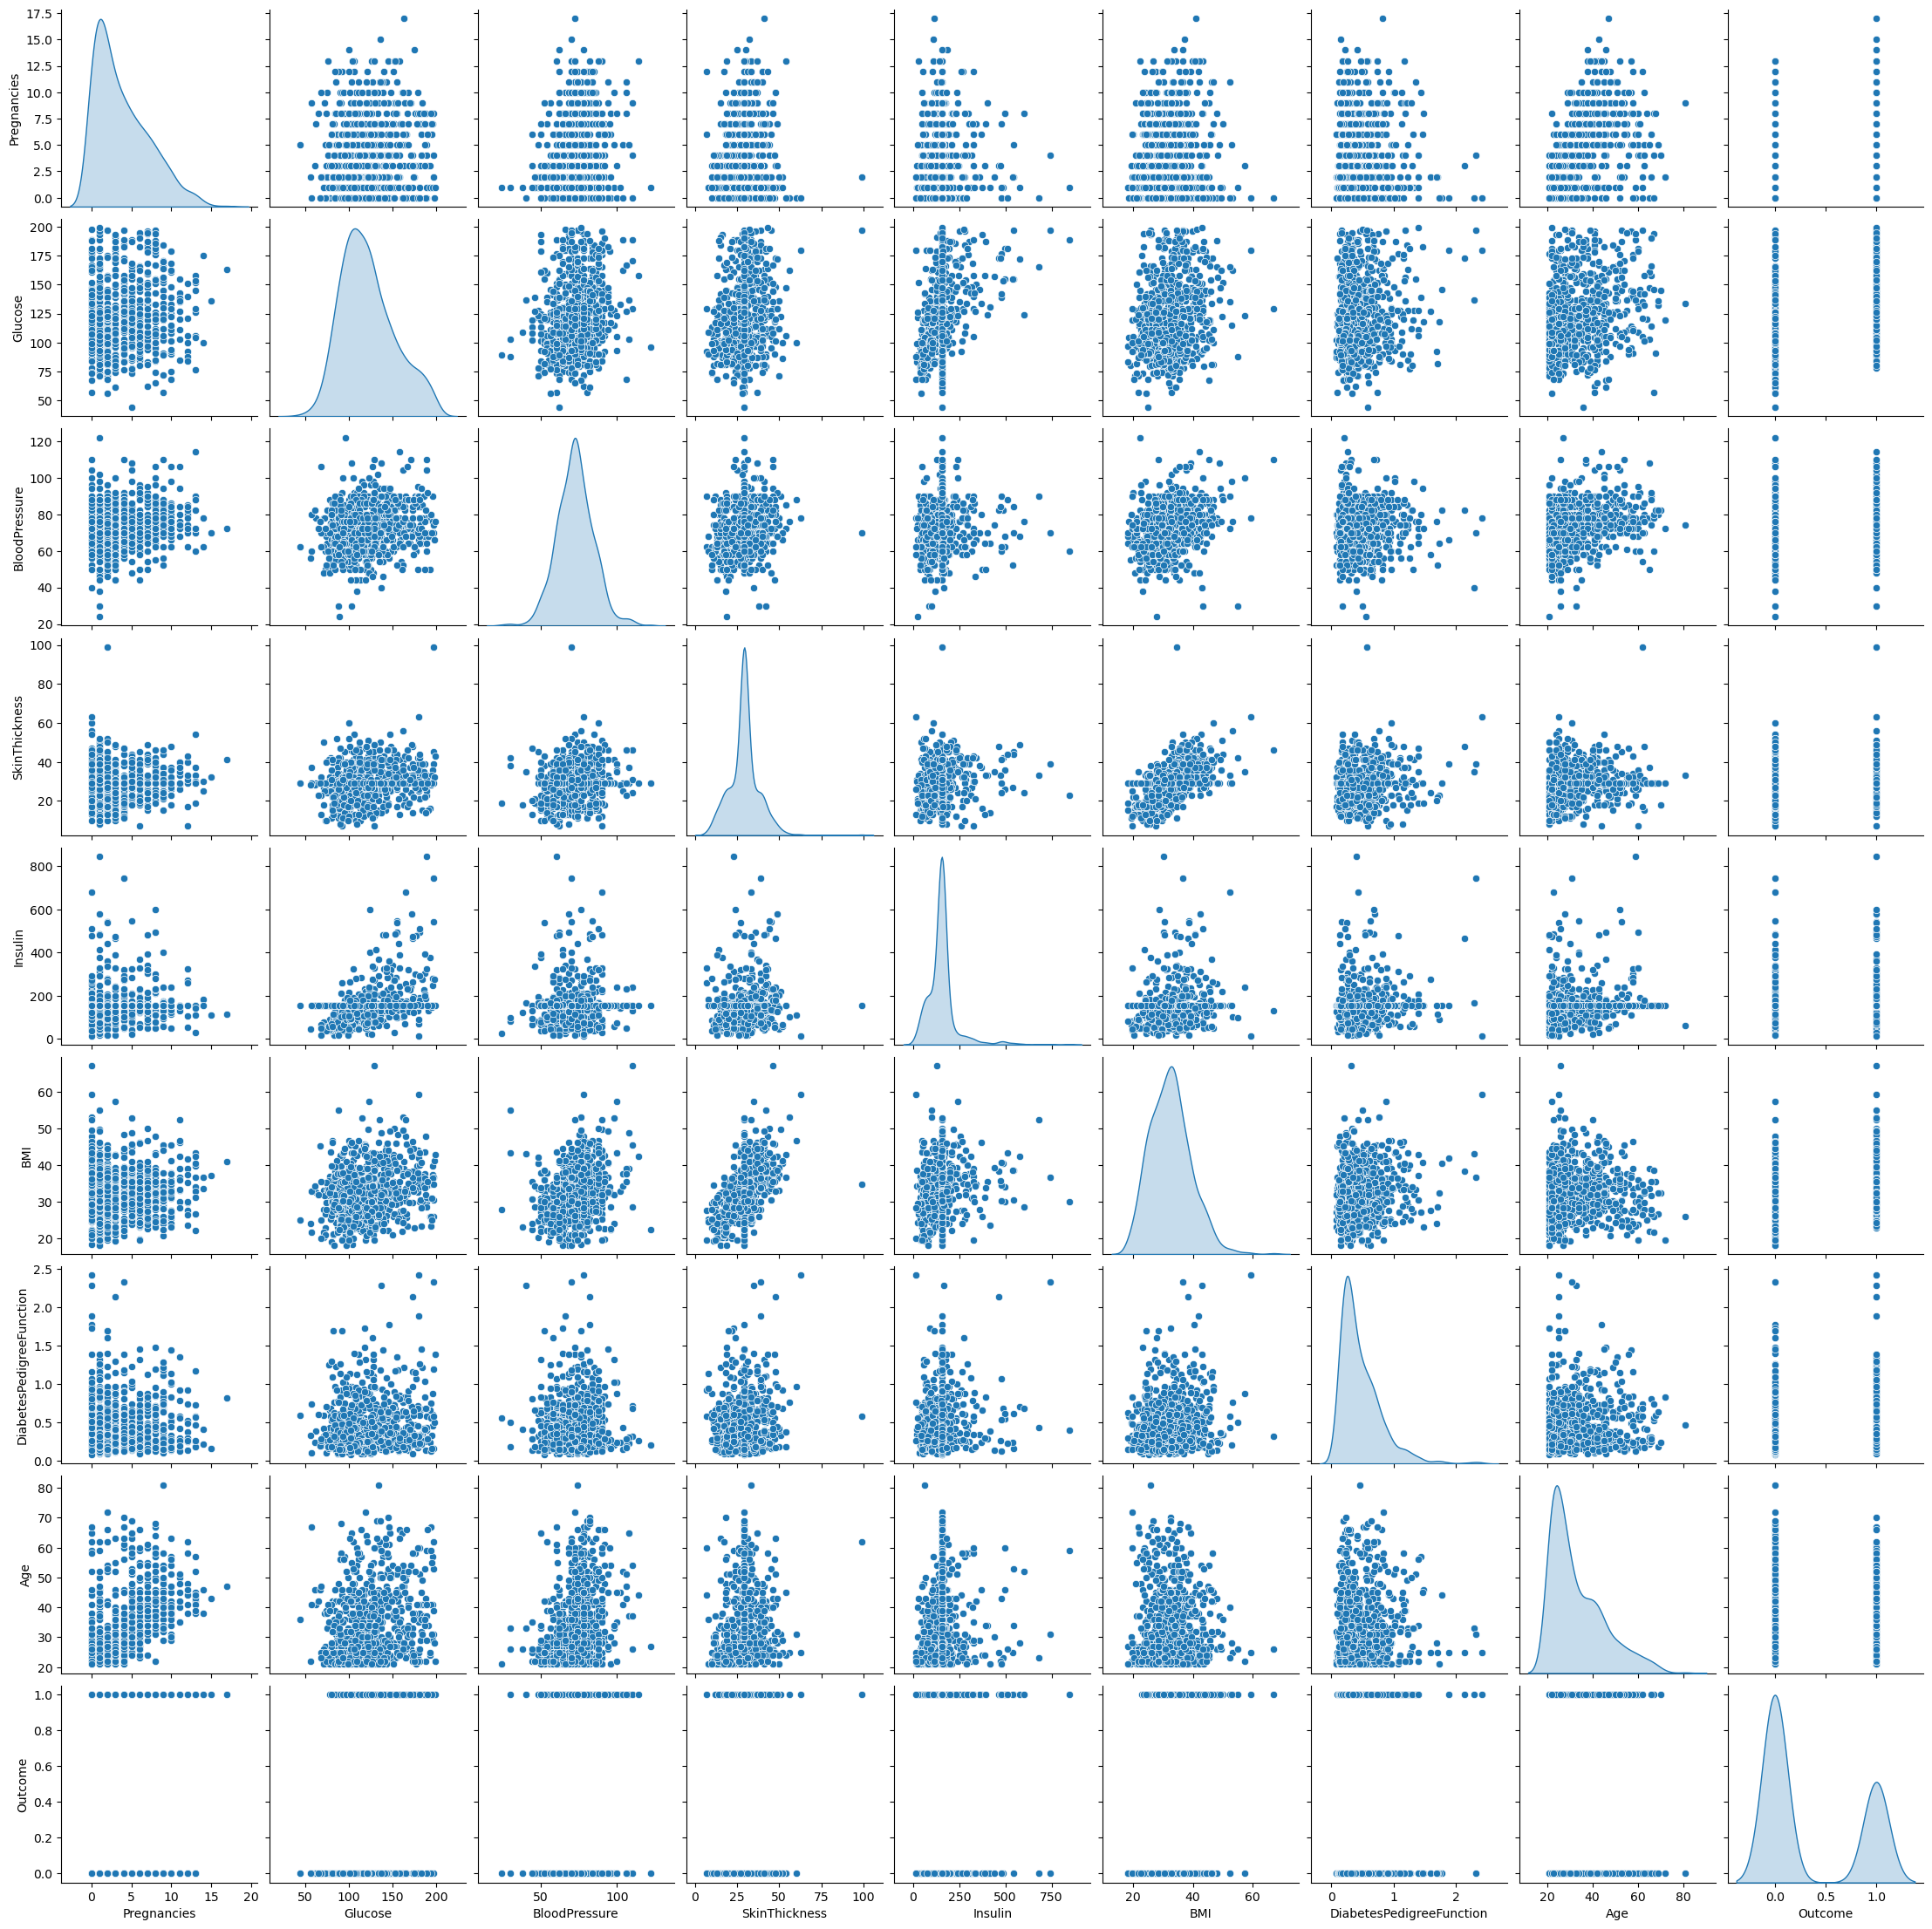

In [14]:
#(A) Pair Plot
#Visualize relationships between all numerical features:
sns.pairplot(data, diag_kind='kde')
plt.show()


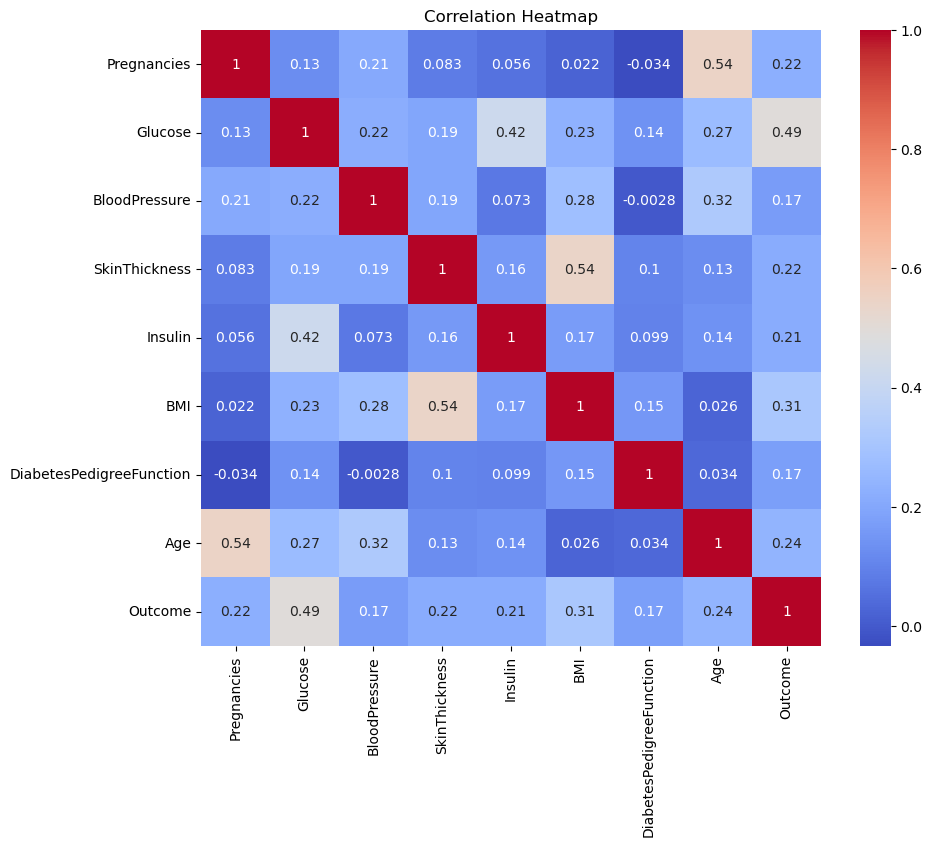

In [15]:
#(B) Correlation Heatmap
#Show relationships between features:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


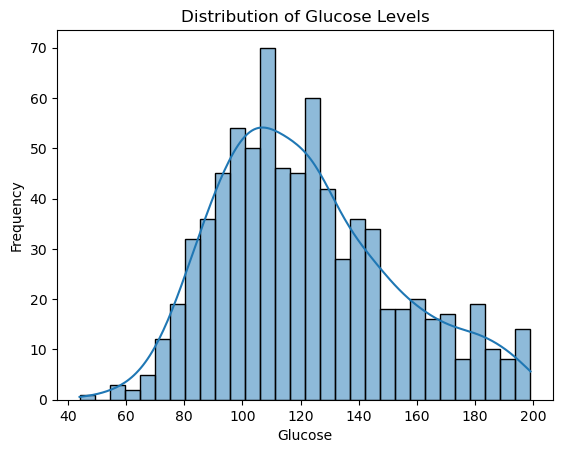

In [16]:
#(C) Distribution Plot
#Shows the distribution of a feature ( glucose levels):
sns.histplot(data['Glucose'], kde=True, bins=30)
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()


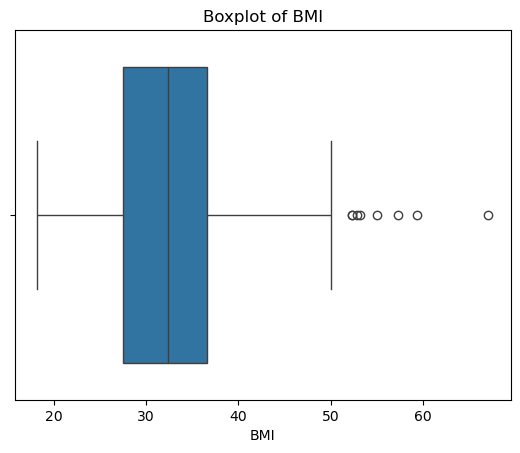

In [24]:
#(D) Box Plot
#Identify outliers in features like BMI
sns.boxplot(x=data['BMI'])
plt.title('Boxplot of BMI')
plt.show()


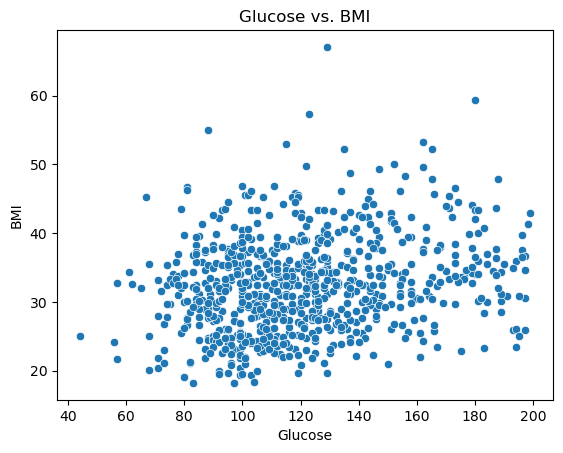

In [26]:
#(e) Scatter Plot
#Explore relationships between two variables:
sns.scatterplot(x=data['Glucose'], y=data['BMI'])
plt.title('Glucose vs. BMI')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()


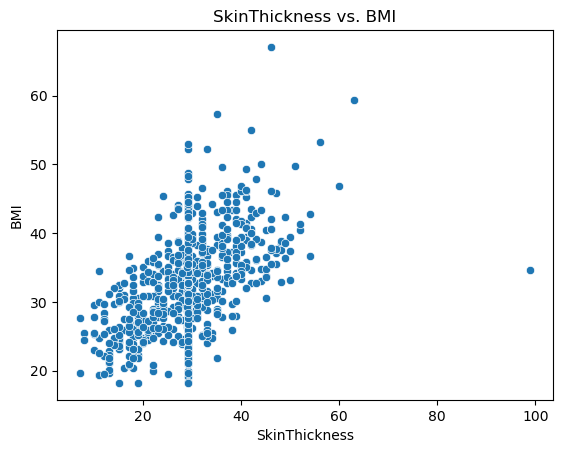

In [28]:
#(e) Scatter Plot
#Explore relationships between two variables:
sns.scatterplot(x=data['SkinThickness'], y=data['BMI'])
plt.title('SkinThickness vs. BMI')
plt.xlabel('SkinThickness')
plt.ylabel('BMI')
plt.show()

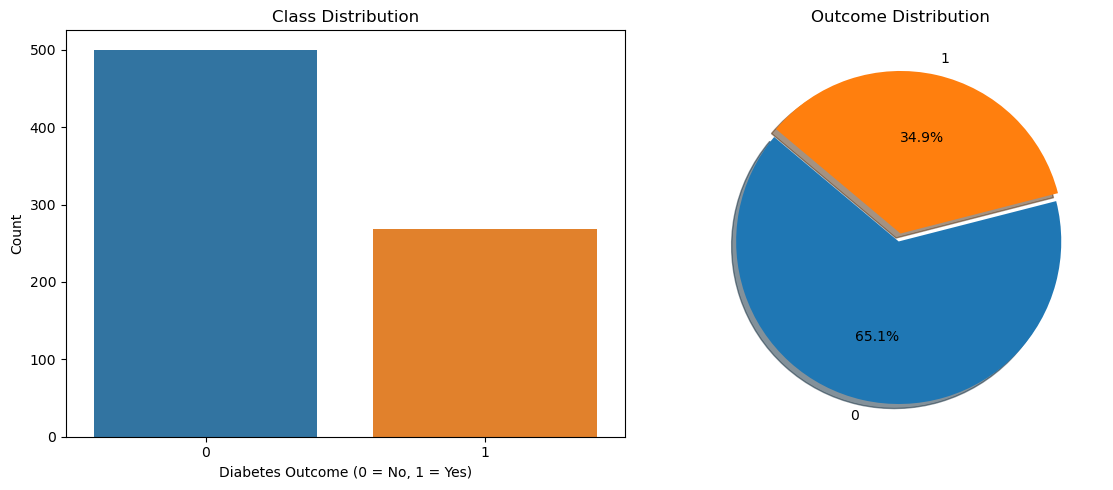

In [34]:
#Pie Chart + Count Plot 
#Count occurrences of each class
outcome_counts = y.value_counts()
labels = outcome_counts.index  # 0 and 1
sizes = outcome_counts.values  # Number of samples
colors = ['#1f77b4', '#ff7f0e']  # Blue and Orange
explode = (0.05, 0)  # Slightly separate the first slice

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count Plot (Bar Chart)
sns.countplot(x=y, ax=axes[0], palette=colors)
axes[0].set_title("Class Distribution")
axes[0].set_xlabel("Diabetes Outcome (0 = No, 1 = Yes)")
axes[0].set_ylabel("Count")

# Pie Chart
axes[1].pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, startangle=140)
axes[1].set_title("Outcome Distribution")

plt.tight_layout()
plt.show()


# Preparing data for machine learning

## Split data into test and train 

In [29]:
# Separate features and target
X = data.drop(columns=['Outcome'])  # Features
y = data['Outcome']  # Target variable

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print dataset shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (614, 8) (614,)
Testing set shape: (154, 8) (154,)


## Feature Scaling

In [31]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Logistic Regression Accuracy: 0.6948051948051948
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.78       100
           1       0.58      0.48      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154

Confusion Matrix:
 [[81 19]
 [28 26]]


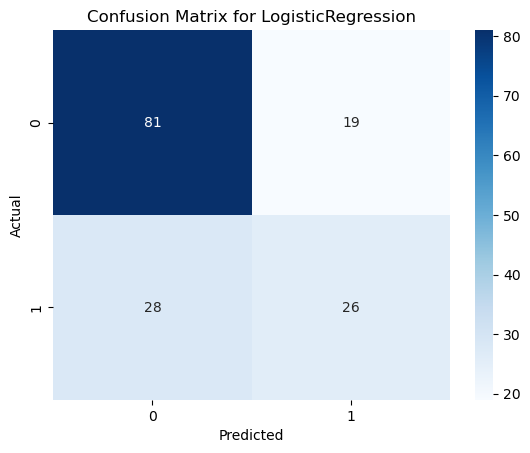

In [33]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000, solver='liblinear')
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
#Visualisation of confusion matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for LogisticRegression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Random Forest Accuracy: 0.7857142857142857
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.63      0.67        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154

Confusion Matrix:
 [[87 13]
 [20 34]]


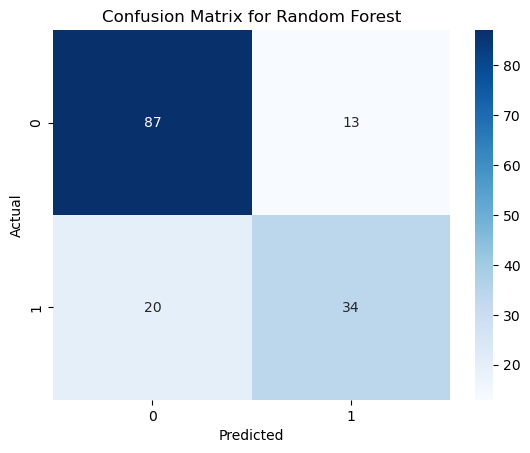

In [35]:
# Random Forest
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
#Visualisation of confusion matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

SVM Accuracy: 0.7337662337662337
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80       100
           1       0.64      0.54      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.73      0.73      0.73       154

Confusion Matrix:
 [[84 16]
 [25 29]]


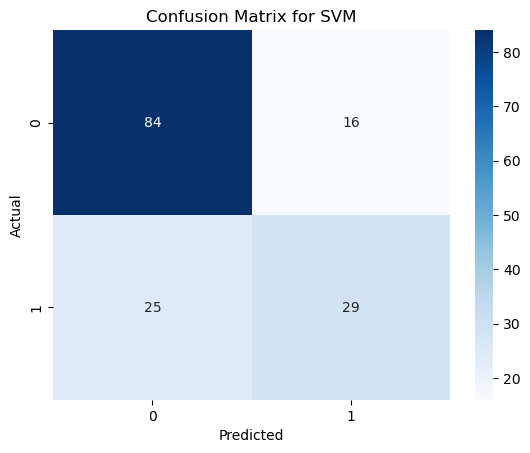

In [37]:
# Support Vector Machine
svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

#Visualisation of confusion matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

KNN Accuracy: 0.7727272727272727
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       100
           1       0.71      0.59      0.65        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154

Confusion Matrix:
 [[87 13]
 [22 32]]


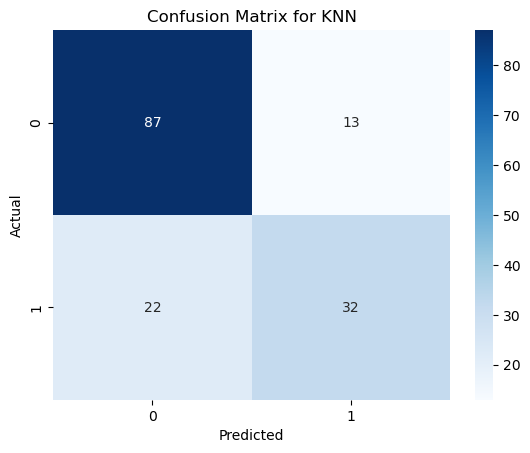

In [39]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
#Visualisation of confusion matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Apply SMOTE to balance the classes

Outcome
1    500
0    500
Name: count, dtype: int64


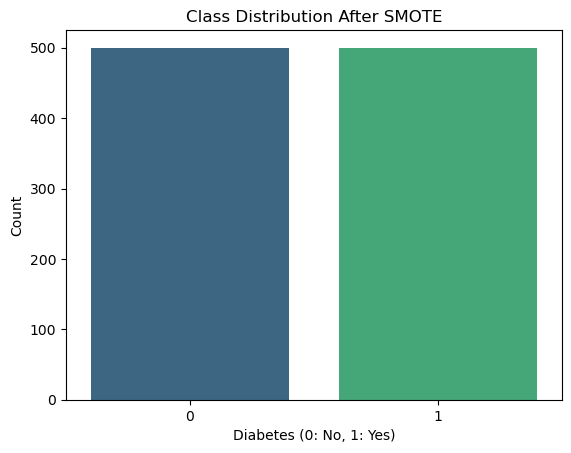

In [41]:
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
print(pd.Series(y_resampled).value_counts())

# Visualize the new distribution
sns.countplot(x=y_resampled, palette="viridis")
plt.title("Class Distribution After SMOTE")
plt.xlabel("Diabetes (0: No, 1: Yes)")
plt.ylabel("Count")
plt.show()


## Split and Scaling the resampled dataset after SMOTE

In [43]:
# Split the resampled dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Print the shape of training and testing sets
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")


Training set: (800, 8), (800,)
Testing set: (200, 8), (200,)


In [47]:
# Initialize the scaler
scaler = StandardScaler()
# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)
# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Save the scaler 
joblib.dump(scaler, 'scaler2.pkl')

# Print a sample of scaled features
print("Sample of scaled training data:\n", X_train_scaled[:5])


Sample of scaled training data:
 [[ 1.23544512  0.12068648 -1.12406697  0.73923573 -0.02282624  1.23807304
   0.45695933  0.26113793]
 [-1.21098086  0.34988628  0.97714053 -0.31180946 -0.03971218 -0.86418069
  -0.78940678  2.2077824 ]
 [ 0.62383863  1.15773142 -0.91008766 -0.05711847 -0.03971218 -1.31097986
  -0.94690451  1.41142785]
 [-1.21098086  0.83459336  0.80557433  1.10746427  1.35309999  1.25066869
  -0.67351222 -0.62370046]
 [ 0.31803538 -0.13482081 -1.08584439  0.10916224 -0.03704346  0.16182042
   1.21520312 -0.26976511]]


## Models training after SMOTE 

#### Logistic Regression

Logistic Regression Accuracy: 0.75

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75       100
           1       0.75      0.75      0.75       100

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200

Confusion Matrix:
 [[75 25]
 [25 75]]


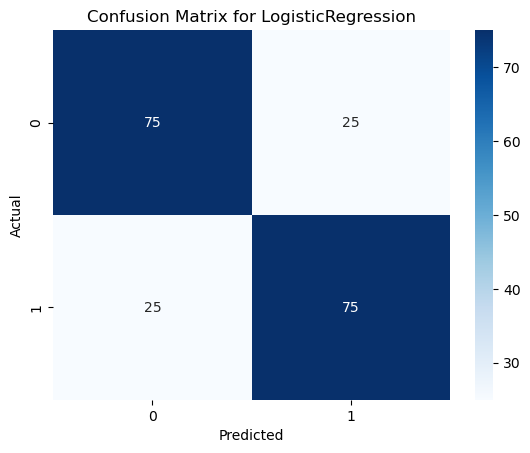

In [49]:
logistic_model = LogisticRegression(max_iter=100)
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))

#Visualisation of confusion matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for LogisticRegression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Random Forest

Random Forest Accuracy: 0.82

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.77      0.81       100
           1       0.79      0.87      0.83       100

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200

Confusion Matrix:
 [[77 23]
 [13 87]]


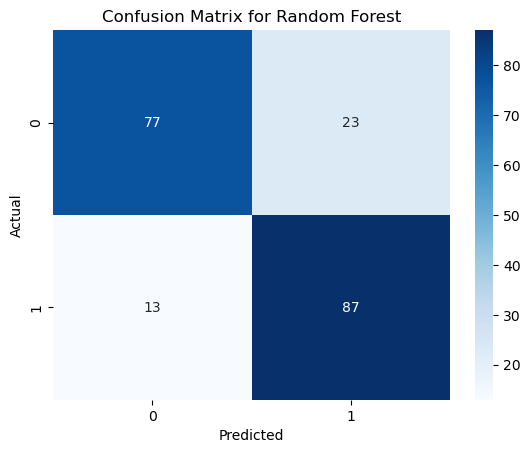

In [51]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

#Visualisation of confusion matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### SVM

SVM Accuracy: 0.74

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.75      0.74       100
           1       0.74      0.73      0.74       100

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200

Confusion Matrix:
 [[75 25]
 [27 73]]


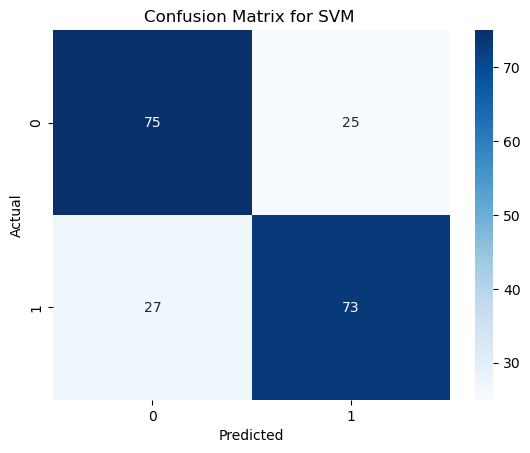

In [53]:
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

#Visualisation of confusion matrix for SVM
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for SVM ")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### KNN

KNN Accuracy: 0.795

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79       100
           1       0.78      0.82      0.80       100

    accuracy                           0.80       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.80      0.79       200

Confusion Matrix:
 [[77 23]
 [18 82]]


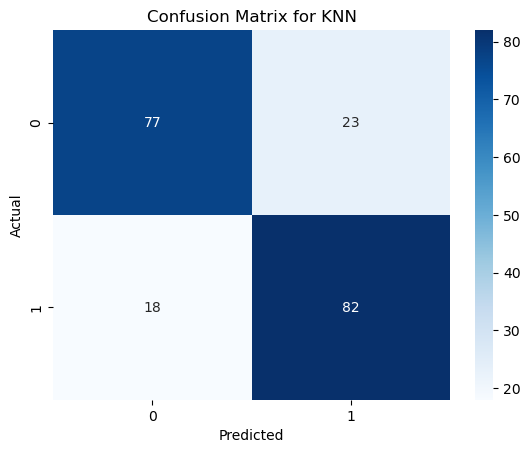

In [55]:
knn_model = KNeighborsClassifier(n_neighbors=8)  
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

#Visualisation of confusion matrix for KNN
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Hyperparameter after SMOTE

In [51]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression
logistic_params = {'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [100, 200, 500, 1000]}
logistic_grid = GridSearchCV(LogisticRegression(), logistic_params, cv=5, scoring='accuracy')
logistic_grid.fit(X_train_scaled, y_train)
print("Best Logistic Regression Parameters:", logistic_grid.best_params_)

# Random Forest
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train_scaled, y_train)
print("Best Random Forest Parameters:", rf_grid.best_params_)

# SVM
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(SVC(), svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train_scaled, y_train)
print("Best SVM Parameters:", svm_grid.best_params_)

# KNN
knn_params = {'n_neighbors': [3, 5, 10, 15], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)
print("Best KNN Parameters:", knn_grid.best_params_)


Best Logistic Regression Parameters: {'C': 0.1, 'max_iter': 100}
Best Random Forest Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}
Best SVM Parameters: {'C': 10, 'kernel': 'rbf'}
Best KNN Parameters: {'n_neighbors': 10, 'weights': 'distance'}


## Train models with the best parameters 

### Optimized Logistic Regression 

Optimized Logistic Regression Accuracy: 0.7450
Classification Report for Optimized Logistic Regression:

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       100
           1       0.75      0.74      0.74       100

    accuracy                           0.74       200
   macro avg       0.75      0.74      0.74       200
weighted avg       0.75      0.74      0.74       200

Confusion Matrix for Optimized Logistic Regression:

[[75 25]
 [26 74]]


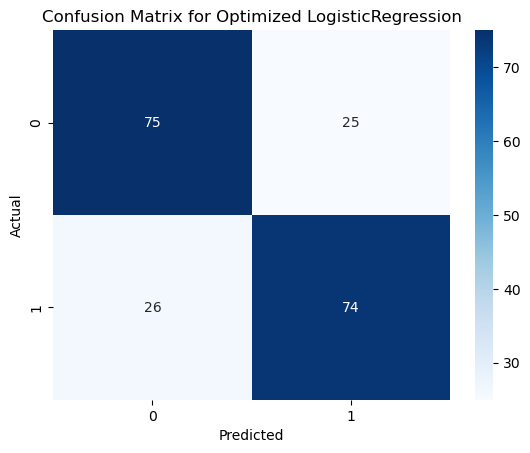

In [57]:
# Train Logistic Regression
best_lr = LogisticRegression(C=0.1, max_iter=100)
best_lr.fit(X_train_scaled, y_train)
lr_accuracy = best_lr.score(X_test_scaled, y_test)
print(f"Optimized Logistic Regression Accuracy: {lr_accuracy:.4f}")
# Get predictions on the test set
lr_predictions = best_lr.predict(X_test_scaled)
print("Classification Report for Optimized Logistic Regression:\n")
print(classification_report(y_test, lr_predictions))

print("Confusion Matrix for Optimized Logistic Regression:\n")
print(confusion_matrix(y_test, lr_predictions))

#Visualisation of confusion matrix for Logistic Regression
cm = confusion_matrix(y_test, lr_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Optimized LogisticRegression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Optimized Random Forest

Optimized Random Forest Accuracy: 0.8250
Classification Report for Optimized Random Forest:

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       100
           1       0.80      0.87      0.83       100

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200

Confusion Matrix for Optimized Random Forest:

[[78 22]
 [13 87]]


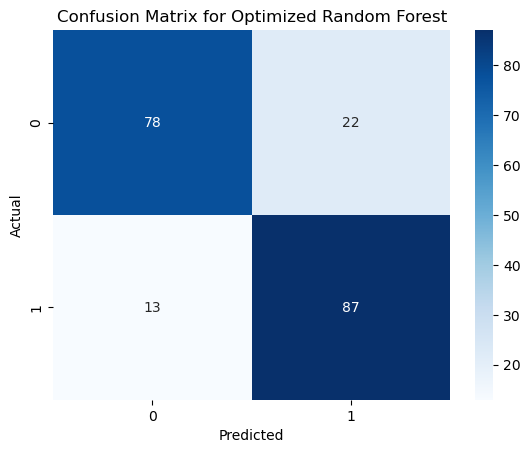

In [59]:
# Train Random Forest
best_rf = RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=50, random_state=42)
best_rf.fit(X_train_scaled, y_train)
rf_accuracy = best_rf.score(X_test_scaled, y_test)
print(f"Optimized Random Forest Accuracy: {rf_accuracy:.4f}")

# Get predictions on the test set
rf_predictions = best_rf.predict(X_test_scaled)

# Generate the classification report
print("Classification Report for Optimized Random Forest:\n")
print(classification_report(y_test, rf_predictions))

# Generate the confusion matrix
print("Confusion Matrix for Optimized Random Forest:\n")
print(confusion_matrix(y_test, rf_predictions))

#Visualisation of confusion matrix for Random Forest 
cm = confusion_matrix(y_test, rf_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Optimized Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Optomized SVM 

Optimized SVM Accuracy: 0.8000
Classification Report for Optimized SVM:

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       100
           1       0.78      0.84      0.81       100

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200

Confusion Matrix for Optimized SVM:

[[76 24]
 [16 84]]


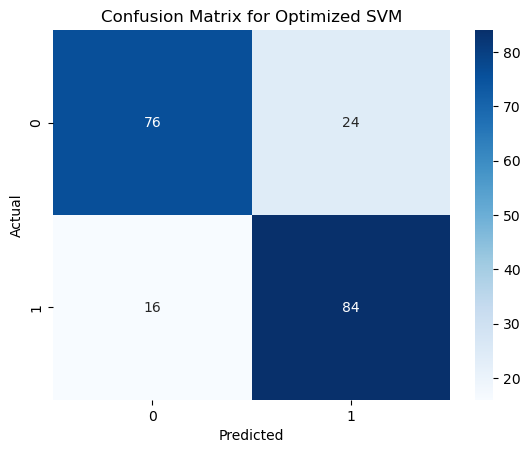

In [61]:
# Train SVM
best_svm = SVC(C=10, kernel='rbf', probability=True)
best_svm.fit(X_train_scaled, y_train)
svm_accuracy = best_svm.score(X_test_scaled, y_test)
print(f"Optimized SVM Accuracy: {svm_accuracy:.4f}")

# Get predictions on the test set
svm_predictions = best_svm.predict(X_test_scaled)

# Generate the classification report
print("Classification Report for Optimized SVM:\n")
print(classification_report(y_test, svm_predictions))

# Generate the confusion matrix
print("Confusion Matrix for Optimized SVM:\n")
print(confusion_matrix(y_test, svm_predictions))


#Visualisation of confusion matrix for SVM
cm = confusion_matrix(y_test, svm_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Optimized SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Optimized KNN

Optimized KNN Accuracy: 0.8050
Classification Report for Optimized KNN:

              precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.75      0.91      0.82       100

    accuracy                           0.81       200
   macro avg       0.82      0.80      0.80       200
weighted avg       0.82      0.81      0.80       200

Confusion Matrix for Optimized KNN:

[[70 30]
 [ 9 91]]


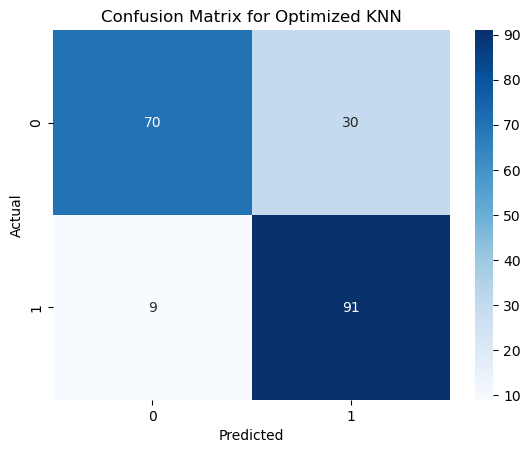

In [63]:
# Train KNN
best_knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
best_knn.fit(X_train_scaled, y_train)
knn_accuracy = best_knn.score(X_test_scaled, y_test)
print(f"Optimized KNN Accuracy: {knn_accuracy:.4f}")

# Get predictions on the test set
knn_predictions = best_knn.predict(X_test_scaled)

# Generate the classification report
print("Classification Report for Optimized KNN:\n")
print(classification_report(y_test, knn_predictions))

# Generate the confusion matrix
print("Confusion Matrix for Optimized KNN:\n")
print(confusion_matrix(y_test, knn_predictions))

#Visualisation of confusion matrix for KNN
cm = confusion_matrix(y_test, knn_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Optimized KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Combine RF,SVM,KNN with VotingClassifier 

Voting Classifier Accuracy: 0.8350
Classification Report for Voting Classifier:

              precision    recall  f1-score   support

           0       0.88      0.78      0.83       100
           1       0.80      0.89      0.84       100

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200

Confusion Matrix for Voting Classifier:

[[78 22]
 [11 89]]


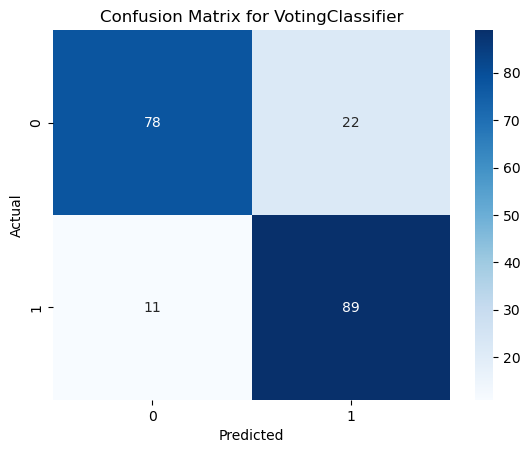

In [65]:
from sklearn.ensemble import VotingClassifier

# Create a Voting Classifier (Soft Voting)
voting_clf = VotingClassifier(
    estimators=[
        ('rf', best_rf),
        ('svm', best_svm),
        ('knn', best_knn)
    ],
    voting='soft'  # 'hard' uses majority voting, 'soft' uses predicted probabilities
)

# Train Voting Classifier
voting_clf.fit(X_train_scaled, y_train)

# Evaluate Voting Classifier
voting_accuracy = voting_clf.score(X_test_scaled, y_test)
print(f"Voting Classifier Accuracy: {voting_accuracy:.4f}")

# Get predictions on the test set
voting_predictions = voting_clf.predict(X_test_scaled)

# Generate the classification report
print("Classification Report for Voting Classifier:\n")
print(classification_report(y_test, voting_predictions))

# Generate the confusion matrix
print("Confusion Matrix for Voting Classifier:\n")
print(confusion_matrix(y_test, voting_predictions))

#Visualisation of confusion matrix for VotingClassifier 
cm = confusion_matrix(y_test, voting_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for VotingClassifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [67]:
# Dictionary to store the model names and their accuracies
model_accuracies = {}

# Add the accuracies of each model
model_accuracies['Logistic Regression'] = accuracy_score(y_test, lr_predictions)
model_accuracies['Random Forest'] = accuracy_score(y_test, rf_predictions)
model_accuracies['SVM'] = accuracy_score(y_test, svm_predictions)
model_accuracies['KNN'] = accuracy_score(y_test, svm_predictions)
model_accuracies['VotingClassifier'] = accuracy_score(y_test, voting_predictions)

# Print all accuracies in a readable format
print("Model Accuracies:")
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy * 100:.2f}%")

Model Accuracies:
Logistic Regression: 74.50%
Random Forest: 82.50%
SVM: 80.00%
KNN: 80.00%
VotingClassifier: 83.50%


### Example for testing Voting classifier 

In [45]:
test_samples = np.array([
    [1, 85, 66, 29, 0, 26.6, 0.351, 31],  # Likely No Diabetes (0)
    [8, 183, 64, 0, 0, 23.3, 0.672, 32],  # Likely Diabetes (1)
    [5, 116, 74, 0, 0, 25.6, 0.201, 30],  # Likely No Diabetes (0)
    [10, 150, 78, 0, 0, 32.5, 0.695, 45],  # Likely Diabetes (1)
    [6,151,62 ,31 ,120 , 35.5, 0.692, 28], # Likely No Diabetes (0)
    [2,124 ,68 ,28 ,205 ,32.9, 0.875, 30 ]  # Likely Diabetes (1)
])

# Apply the same scaling
test_samples_scaled = scaler.transform(test_samples)

# Get predictions
predictions = voting_clf.predict(test_samples_scaled)

# Print results
for i, pred in enumerate(predictions):
    print(f"Sample {i+1}: Predicted Class -> {pred}")


Sample 1: Predicted Class -> 0
Sample 2: Predicted Class -> 1
Sample 3: Predicted Class -> 0
Sample 4: Predicted Class -> 0
Sample 5: Predicted Class -> 0
Sample 6: Predicted Class -> 1


## Save the trained model 

In [47]:
# Save the trained Voting Classifier
joblib.dump(voting_clf, "diabetes_voting_model.pkl")

print("Model saved successfully!")


Model saved successfully!


In [49]:
# Load the saved model
loaded_model = joblib.load("diabetes_voting_model.pkl")

# Test the model with test data
test_accuracy = loaded_model.score(X_test_scaled, y_test)
print(f"Loaded Model Accuracy: {test_accuracy:.4f}")


Loaded Model Accuracy: 0.8350
